In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import json

# Function to load configurations
def load_config(config_file):
    with open(config_file, 'r') as file:
        config = json.load(file)
    return config

# Load the configuration
config = load_config('config/config.json')

# Access the dataset path
dataset_dir = config['dataset_path']
train_dir = config['train_path']
val_dir = config['val_path']
test_dir = config['test_path']

In [3]:

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for sublabel in os.listdir(label_path):
                sublabel_path = os.path.join(label_path, sublabel)
                if os.path.isdir(sublabel_path):
                    for filename in os.listdir(sublabel_path):
                        img_path = os.path.join(sublabel_path, filename)
                        try:
                            with Image.open(img_path) as img:
                                img = img.convert('L')
                                img = img.resize((512, 512))
                                img_array = np.array(img).flatten()
                                images.append(img_array)
                                labels.append(label)
                        except Exception as e:
                            print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

In [4]:
X_train, y_train = load_images_from_folder(train_dir)
X_val, y_val = load_images_from_folder(val_dir)

In [5]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf_classifier.predict(X_val)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Compute accuracy
accuracy = accuracy_score(y_val_encoded, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Generate classification report and convert it into a DataFrame
report = classification_report(y_val_encoded, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print the classification report in DataFrame format
print("Classification Report:")
print(report_df)

# Compute confusion matrix
cm = confusion_matrix(y_val_encoded, y_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

Validation Accuracy: 46.43%
Classification Report:
              precision    recall  f1-score    support
edible         0.440000  0.916667  0.594595  12.000000
poisonous      0.666667  0.125000  0.210526  16.000000
accuracy       0.464286  0.464286  0.464286   0.464286
macro avg      0.553333  0.520833  0.402560  28.000000
weighted avg   0.569524  0.464286  0.375127  28.000000


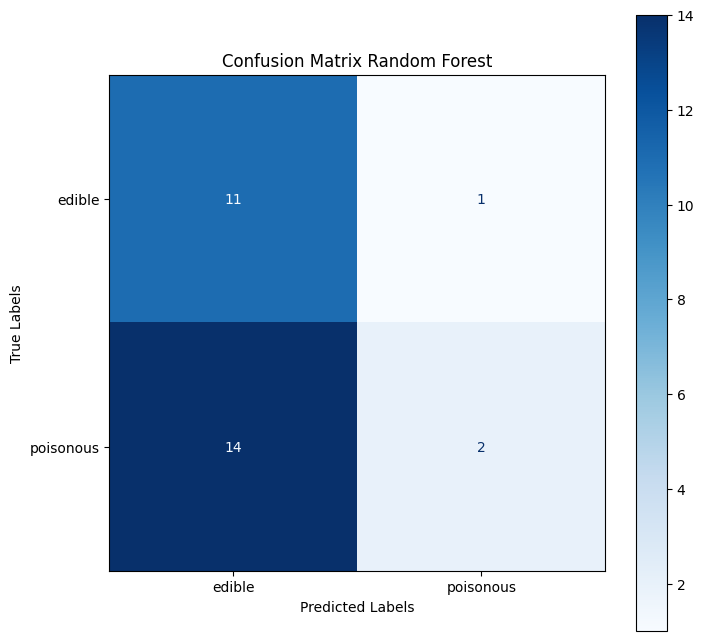

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_val_encoded and y_pred are your true labels and predictions respectively
cm = confusion_matrix(y_val_encoded, y_pred)

# Displaying the confusion matrix more visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot adjustments
fig, ax = plt.subplots(figsize=(8, 8))  # You can specify the size as needed
disp.plot(ax=ax, cmap='Blues')  # You can choose any colormap that fits the display

plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
plt.show()